In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
#define variables

In [4]:
q = 1
sigma = 2 
walks = 500
R = 1
T=1
N = 500
dt = T/N
sigmaSqrtDt = sigma * np.sqrt(T/N)
def u(X) :
    pre = q / (2*np.pi * (X[0]**2 + X[1]**2)) 
    return np.array([1+pre*X[0], pre*X[1]])

In [5]:
times = np.linspace(0,T,N)
X = np.zeros((2,N))
X[:,0] = [1.2,1.1]
#X[:,0] = [3,4]
#X[:,0] = [2.5,2.5]

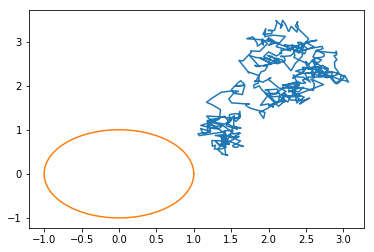

In [11]:
#diff equation
for i in range(N-1):
    X[:,i+1] = X[:,i] + u(X[:,i]) * dt + sigmaSqrtDt* norm.rvs(size=2) 
plt.plot(X[0,:],X[1,:])


theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))

In [175]:
def simpleRandomWalk(X0, N, T):
    times = np.linspace(0,T,N)
    X = []
    dt = T/N
    sigmaSqrtDt = sigma * np.sqrt(dt)
    X.append(X0)
    finalT = dt
    for i in range(N-1):
        X0 = X0 + u(X0) * dt + sigmaSqrtDt* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
        if(r<1):
            break
    
    return np.asarray(X), finalT

0.10200000000000008


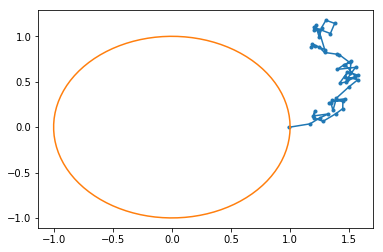

In [178]:
X, finalTime = simpleRandomWalk([1.2,1.1], N, T)
X = X.T
plt.plot(X[0,:],X[1,:], '.-')

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

In [179]:
polluted = 0
X0 = [1.1,1.2]
X_next = [0,0]
for w in range(walks):
    #diff equation
    X_0 = [1.1,1.2]
    _, finalT = simpleRandomWalk(X0, N, T)
    if finalT < 1:
            polluted+=1

print(polluted/walks)

0.462
